In [130]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [12]:
data = pd.read_csv("train.csv")
data.head()
data.shape

(1000, 12)

In [13]:
tensor_data = tf.constant(data)

In [15]:
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [16]:
tensor_data = tf.cast(tensor_data, tf.float32)

In [17]:
tensor_data = tf.random.shuffle(tensor_data)

In [18]:
X = tensor_data[:,3:-1]

In [20]:
X.shape

TensorShape([1000, 8])

In [21]:
Y = tensor_data[:,-1]

In [22]:
Y.shape

TensorShape([1000])

In [24]:
Y = tf.expand_dims(Y, axis = -1)

In [105]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [106]:
x_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = Y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [151]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [152]:
for x,y in train_dataset:
    print(x,y)
    break

tf.Tensor(
[[4.00000e+00 9.62060e+04 5.00000e+00 4.00000e+00 8.00000e+00 1.94000e+02
  5.30000e+01 7.10000e+01]
 [6.00000e+00 9.09690e+04 1.00000e+00 4.00000e+00 1.10000e+01 1.79000e+02
  1.20000e+02 1.00000e+02]
 [2.00000e+00 1.32538e+05 2.00000e+00 8.00000e+00 1.50000e+01 1.81000e+02
  5.30000e+01 9.70000e+01]
 [6.00000e+00 8.92790e+04 2.00000e+00 7.00000e+00 8.00000e+00 1.53000e+02
  7.80000e+01 1.40000e+02]
 [6.00000e+00 1.11922e+05 3.00000e+00 9.00000e+00 1.30000e+01 1.93000e+02
  5.90000e+01 1.40000e+02]
 [3.00000e+00 5.26860e+04 1.00000e+00 8.00000e+00 1.20000e+01 1.91000e+02
  7.10000e+01 7.30000e+01]
 [7.00000e+00 9.25670e+04 3.00000e+00 8.00000e+00 1.20000e+01 1.91000e+02
  8.30000e+01 1.01000e+02]
 [3.00000e+00 9.67840e+04 3.00000e+00 2.00000e+00 1.40000e+01 1.45000e+02
  9.30000e+01 1.24000e+02]
 [2.00000e+00 1.13723e+05 3.00000e+00 6.00000e+00 1.30000e+01 1.73000e+02
  1.16000e+02 1.16000e+02]
 [7.00000e+00 7.28720e+04 4.00000e+00 8.00000e+00 1.40000e+01 1.74000e+02
  6.10

In [109]:
x_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [153]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [110]:
x_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = Y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [154]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [111]:
normalizer = Normalization()
normalizer.adapt(x_train)

In [29]:
normalizer(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 1.4194924 ,  0.68175596,  0.00855888, ..., -0.6168977 ,
        -1.5870918 ,  0.07492458],
       [-0.9084987 , -0.11979859,  0.00855888, ..., -1.135604  ,
         0.41225678,  0.9776153 ],
       [-1.4904965 ,  1.1073481 , -0.70466226, ...,  0.7317387 ,
        -1.5383272 , -0.30515572],
       ...,
       [-0.9084987 , -0.7756565 ,  0.00855888, ..., -0.3056739 ,
        -0.07538921, -0.06760553],
       [ 1.4194924 ,  1.6004857 ,  0.00855888, ..., -0.20193264,
        -0.4167414 ,  1.1676555 ],
       [ 0.8374946 , -1.0219507 ,  1.4350011 , ...,  0.8873506 ,
        -1.6358564 , -1.2078464 ]], dtype=float32)>

In [46]:
model = tf.keras.Sequential([
    normalizer,
    Dense(1),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


In [47]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [135]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(1),
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

In [139]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [136]:
model.compile(optimizer=Adam(learning_rate= 0.1),
    loss = MeanAbsoluteError(),
            metrics = RootMeanSquaredError()
             )

In [155]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 42ms/step - loss: 35051.8438 - root_mean_squared_error: 43118.4297 - val_loss: 36609.8242 - val_root_mean_squared_error: 45907.3086
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 31369.7402 - root_mean_squared_error: 39607.3008 - val_loss: 33616.5664 - val_root_mean_squared_error: 43182.9492
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 33014.8164 - root_mean_squared_error: 41392.9297 - val_loss: 31944.7422 - val_root_mean_squared_error: 41197.9336
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 32211.5918 - root_mean_squared_error: 40614.7539 - val_loss: 31687.0449 - val_root_mean_squared_error: 40106.1406
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 32604.5293 - root_mean_squared_error: 41254.2461 - val_loss: 38746.2344 - val_root_mean_squared_error: 48837.5742
Epoch 6/100
25/25 [==============================] - 0s 7ms/step

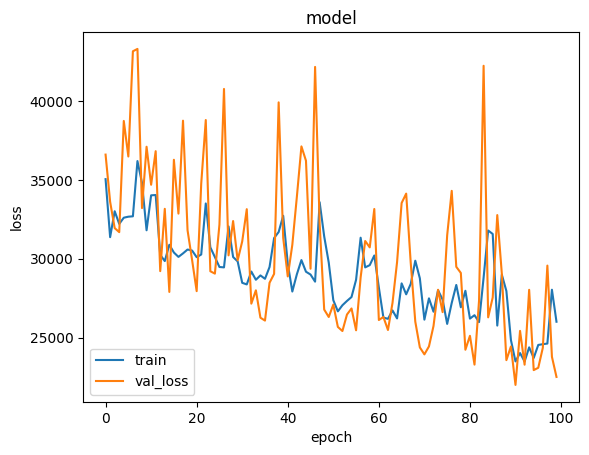

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['train', 'val_loss'])
plt.show()

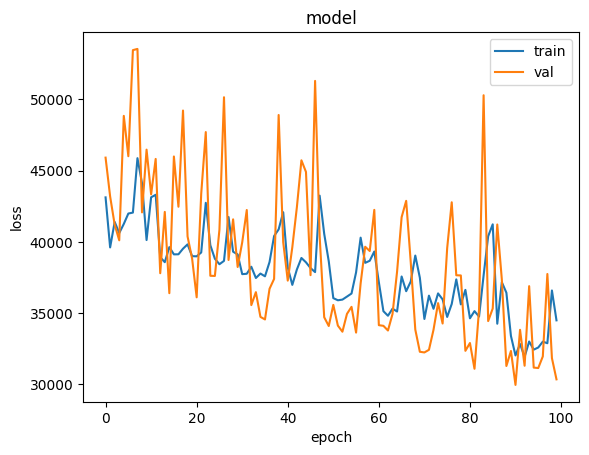

In [157]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend (['train','val'])
plt.show()

In [118]:
model.evaluate(x_val, y_val)

4/4 [==============================] - 0s 6ms/step - loss: 314947.2188 - root_mean_squared_error: 340926.3125


[314947.21875, 340926.3125]

In [158]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 42883.6758 - root_mean_squared_error: 54274.5977


[42883.67578125, 54274.59765625]

In [122]:
x_test.shape

TensorShape([100, 8])

In [147]:
model.predict(x_test).shape

4/4 [==============================] - 0s 5ms/step


(100, 1)

In [146]:
model.predict(tf.expand_dims(x_test[0], axis = 0 )).shape

1/1 [==============================] - 0s 70ms/step


(1, 1)

In [125]:
model.predict(tf.expand_dims(x_test[0], axis = 0 ))

1/1 [==============================] - 0s 71ms/step


array([[5129.505]], dtype=float32)

In [126]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([320008.], dtype=float32)>

In [164]:
y_true = list(y_test[:,0].numpy())

In [165]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 4ms/step
[318720.38, 436545.9, 128140.98, 216568.14, 199668.2, 404668.1, 401556.8, 494026.6, 211249.8, 259264.2, 392409.8, 309569.78, 250778.39, 464226.53, 187869.61, 475367.84, 394371.84, 375765.03, 331040.84, 386399.0, 218884.98, 232355.58, 219483.92, 469152.22, 111639.25, 306036.53, 86437.7, 218577.11, 444055.7, 277247.25, 332238.9, 128762.06, 171524.95, 128724.59, 217622.7, 423086.2, 224933.61, 295934.03, 468153.34, 297983.66, 528665.4, 159935.61, 159540.33, 352840.22, 170215.7, 458678.97, 504399.94, 300949.06, 456030.66, 322477.94, 507333.62, 465623.22, 495741.47, 362373.78, 156545.14, 77394.69, 415684.72, 466107.6, 99934.18, 216746.11, 105252.45, 253879.44, 284762.53, 314429.2, 322241.3, 234811.47, 558743.06, 267138.9, 290721.4, 374050.28, 149767.3, 219831.72, 309935.28, 473256.4, 131041.67, 464800.6, 114908.055, 318881.1, 475696.4, 414063.34, 358632.12, 182246.88, 301292.84, 114362.8, 356486.66, 303764.38, 427377.9, 154575.77, 486280.22,

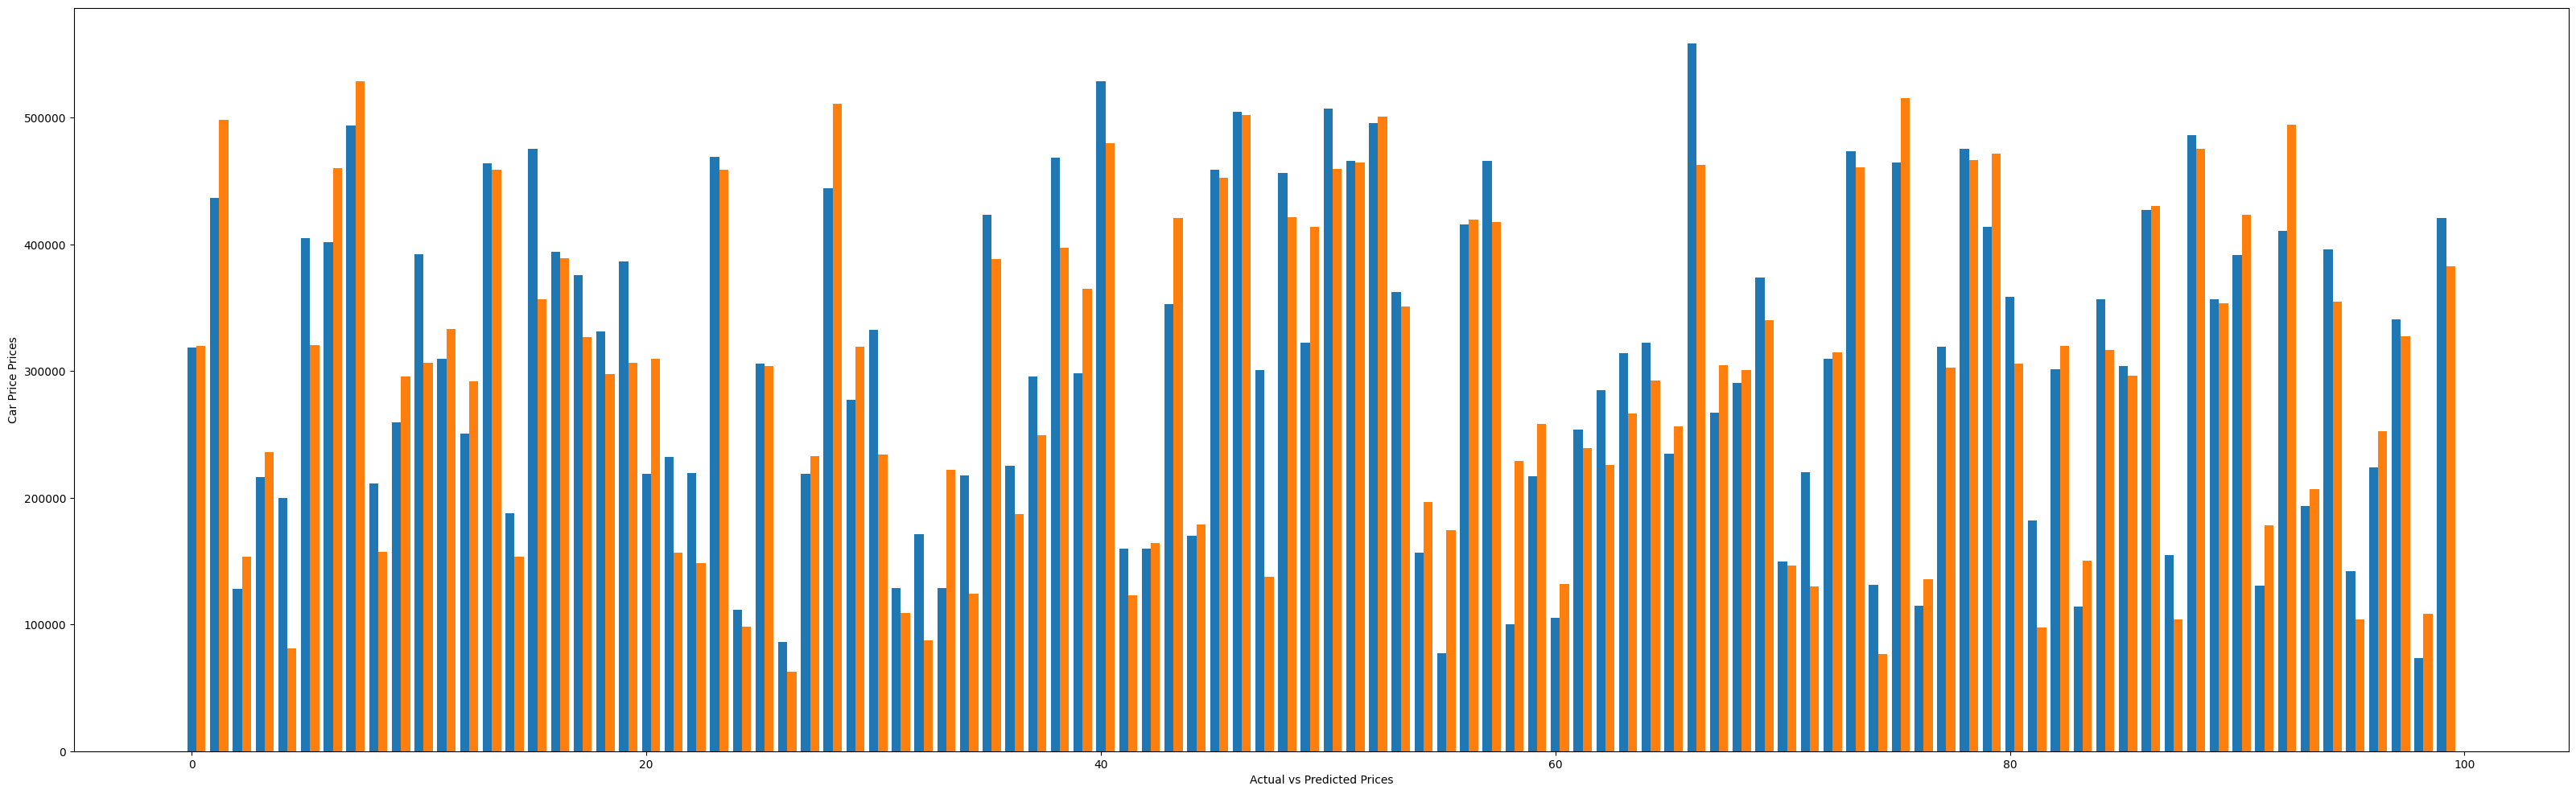

In [166]:
ind = np.arange (100)
plt.figure (figsize=(40,12))

width = 0.4

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar (ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')
plt.show()

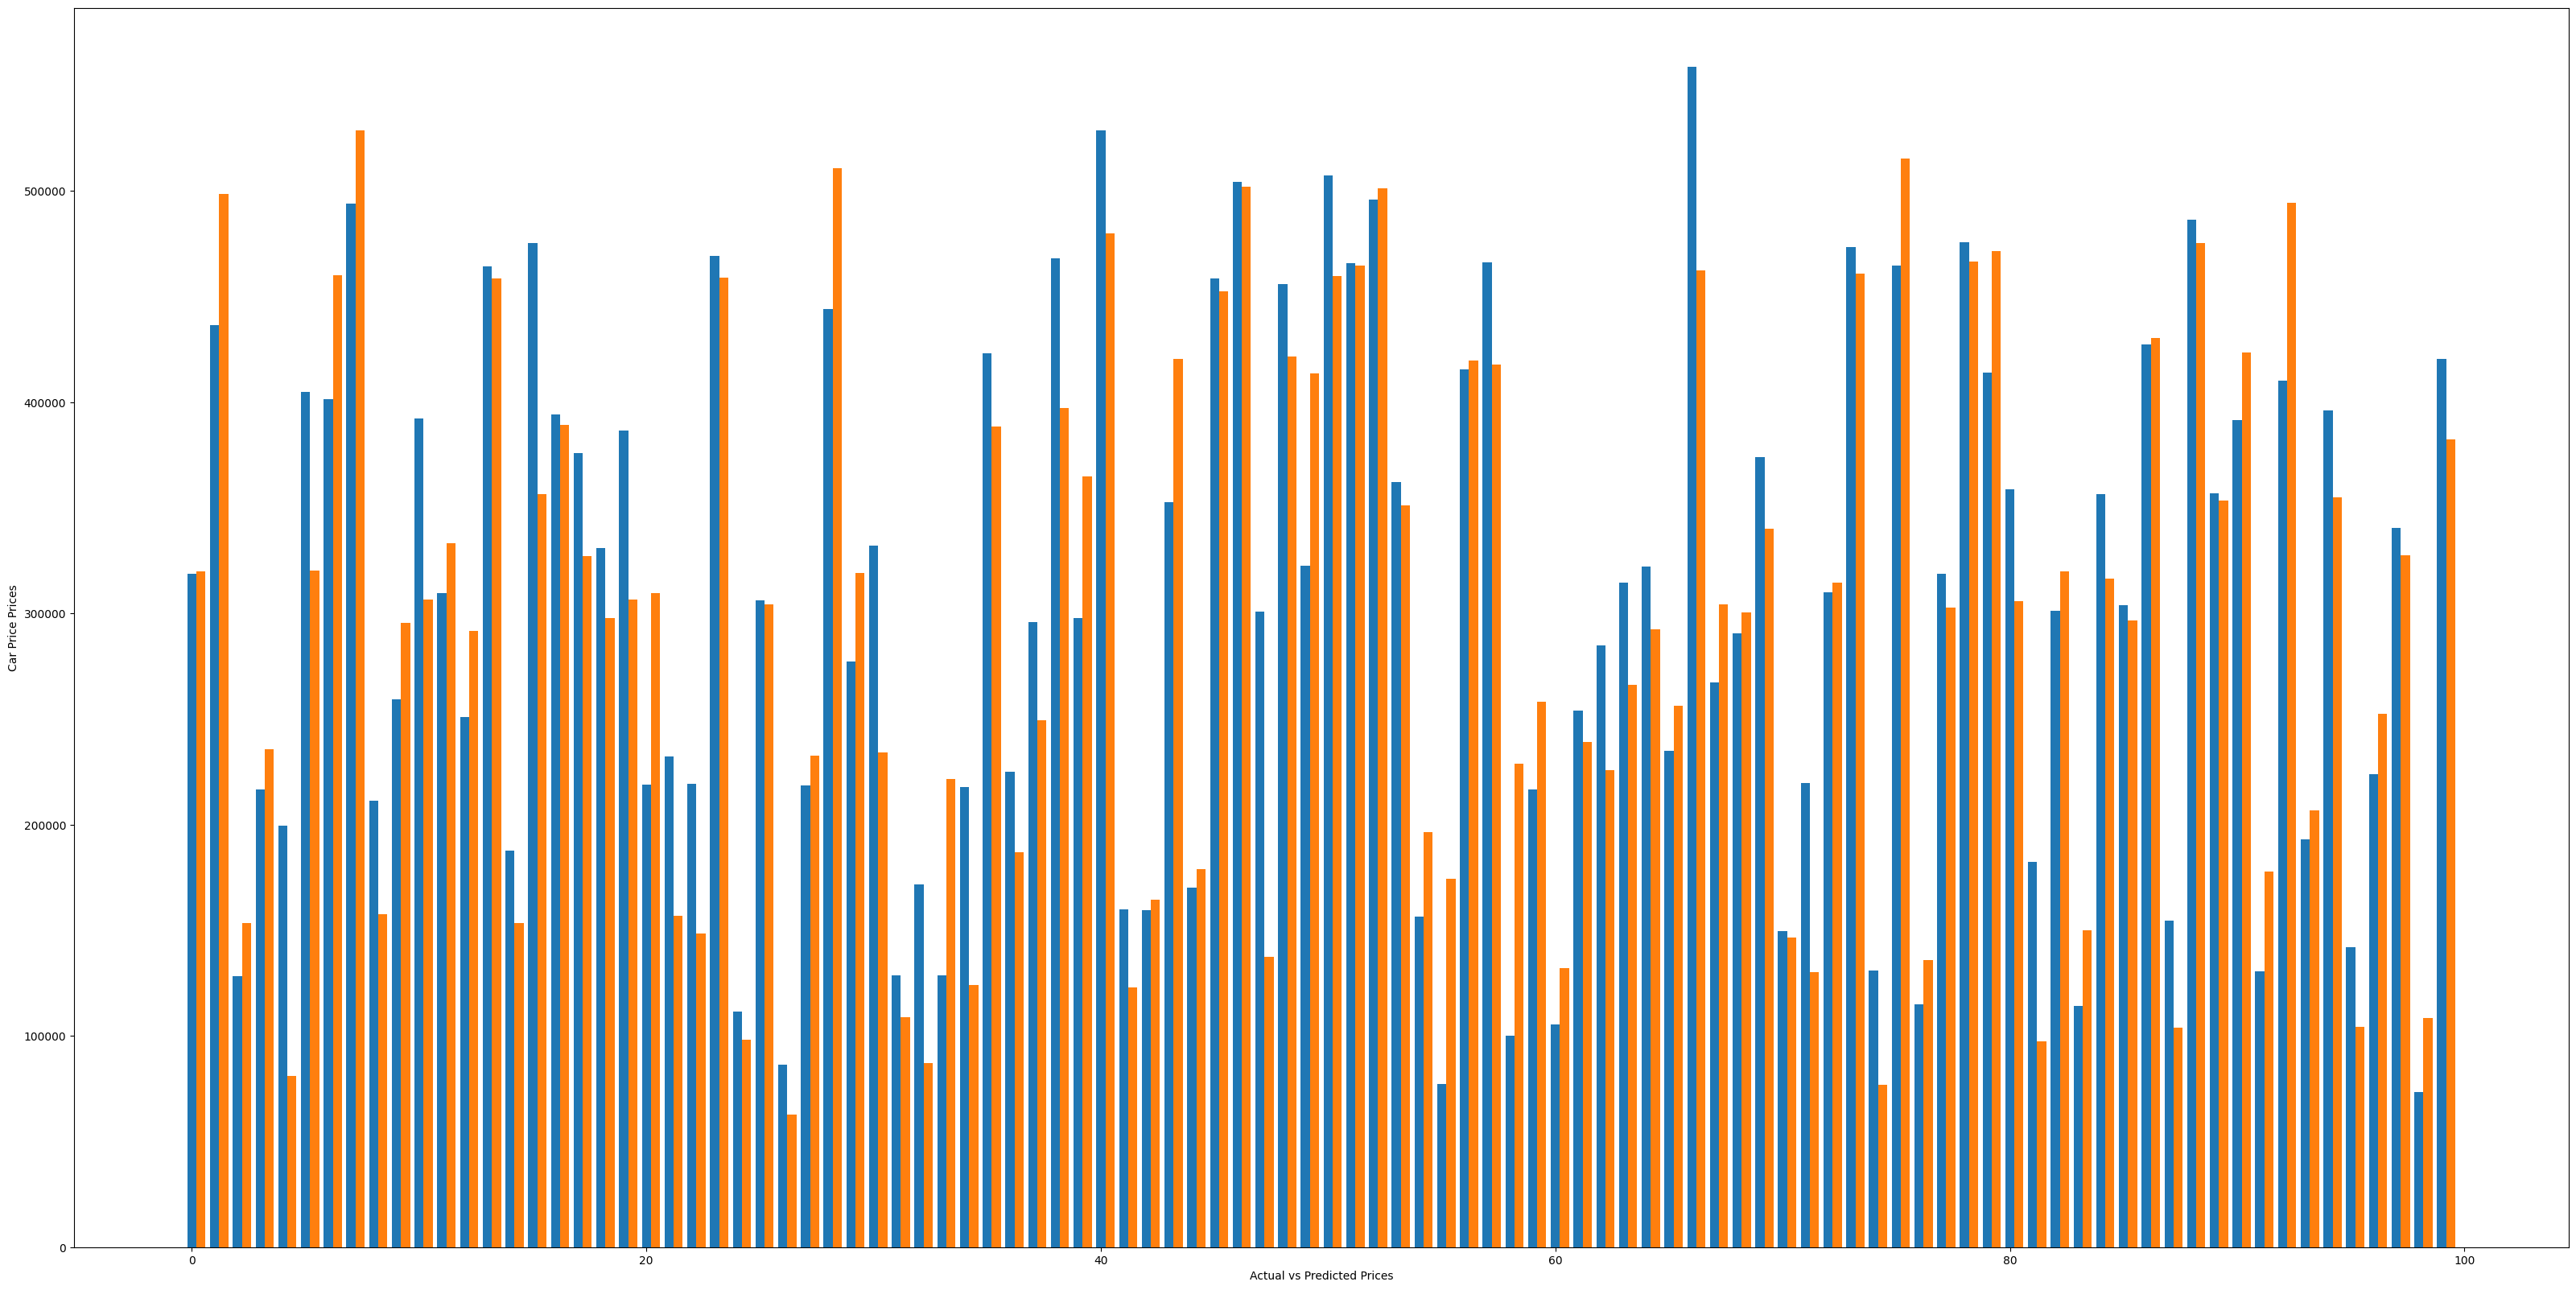

In [167]:
ind = np.arange (100)
plt.figure (figsize=(40,20))

width = 0.4

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar (ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')
plt.show()